# Regression models using Boston Dataset


In [6]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sea

In [11]:
#Import dataset
data=pd.read_csv("D:/Tarah/datasets/boston.csv")

In [12]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [4]:
data.shape #shape

(506, 14)

In [5]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674030,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148862,2.105710,8.707259,168.537116,2.164946,91.294863,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377487,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440002,11.360000,21.200001
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.074999,5.188425,24.000000,666.000000,20.200001,396.225006,16.954999,25.000000
max,88.976196,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.899994,37.970001,50.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM     506 non-null float64
ZN       506 non-null float64
INDUS    506 non-null float64
CHAS     506 non-null int64
NOX      506 non-null float64
RM       506 non-null float64
AGE      506 non-null float64
DIS      506 non-null float64
RAD      506 non-null int64
TAX      506 non-null int64
PT       506 non-null float64
B        506 non-null float64
LSTAT    506 non-null float64
MV       506 non-null float64
dtypes: float64(11), int64(3)
memory usage: 55.4 KB


In [7]:
data.isnull().sum() #checking null values


CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64

### Checking multicolinearity

In [8]:
#Corelations between attributes
data.corr(method='pearson') #1 meaning total correlation, -1 negative correlation, 0 no correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [9]:
%timeit data.corr(method='pearson') #%timeit is a command in ipython useful for micro-benchmarking.

1.29 ms ± 19.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [10]:
#correlation between input attributes and the target
pearson = data.corr(method='pearson')
corr_with_target = pearson.iloc[-1][:-1]
corr_with_target[abs(corr_with_target).argsort()[::-1]]

LSTAT   -0.737663
RM       0.695360
PT      -0.507787
INDUS   -0.483725
TAX     -0.468536
NOX     -0.427321
CRIM    -0.388305
RAD     -0.381626
AGE     -0.376955
ZN       0.360445
B        0.333461
DIS      0.249929
CHAS     0.175260
Name: MV, dtype: float64

In [11]:
#selecting strong correlations between attribute pairs.
attrs = pearson.iloc[:-1,:-1] # all except target

# only important correlations and not auto-correlations
threshold = 0.7
important_corrs = (attrs[abs(attrs) > threshold][attrs != 1.0]) \
                  .unstack().dropna().to_dict()

unique_important_corrs = pd.DataFrame(
    list(set([(tuple(sorted(key)), important_corrs[key]) \
    for key in important_corrs])), columns=['attribute pair', 'correlation'])

# sorted by absolute value
unique_important_corrs = unique_important_corrs.iloc[
   abs(unique_important_corrs['correlation']).argsort()[::-1]]

unique_important_corrs

,attribute pair,correlation
1,"(RAD, TAX)",0.910228
3,"(DIS, NOX)",-0.769230
2,"(INDUS, NOX)",0.763651
6,"(AGE, DIS)",-0.747881
0,"(AGE, NOX)",0.731470
5,"(INDUS, TAX)",0.720760
4,"(DIS, INDUS)",-0.708027


### Removing Outliers

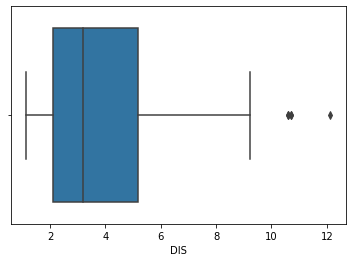

In [12]:
# Box Plot
sea.boxplot(data.DIS)

In [13]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

CRIM       3.595038
ZN        12.500000
INDUS     12.910000
CHAS       0.000000
NOX        0.175000
RM         0.738000
AGE       49.049999
DIS        3.088250
RAD       20.000000
TAX      387.000000
PT         2.800001
B         20.847519
LSTAT     10.005000
MV         7.975000
dtype: float64


In [14]:
dataN=data[~((data < (Q1 - 1.5 * IQR)) |(data > (Q3 + 1.5 * IQR))).any(axis=1)]

In [15]:
dataN.shape

(268, 14)

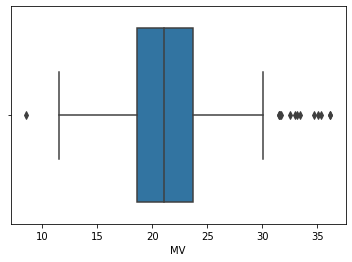

In [16]:
sea.boxplot(dataN.MV)

In [17]:
# Z-Score
from scipy import stats
z = np.abs(stats.zscore(data))
print(z)

[[0.41978194 0.28482986 1.28790951 ... 0.44105189 1.0755623  0.15968565]
 [0.41733927 0.48772236 0.593381   ... 0.44105189 0.49243932 0.10152425]
 [0.41734159 0.48772236 0.593381   ... 0.39642687 1.20872737 1.32424674]
 ...
 [0.41344658 0.48772236 0.11573844 ... 0.44105189 0.98304763 0.14880187]
 [0.40776408 0.48772236 0.11573844 ... 0.40322506 0.86530163 0.0579893 ]
 [0.41500016 0.48772236 0.11573844 ... 0.44105189 0.66905832 1.15724786]]


In [18]:
threshold = 3
print(np.where(z > 3))

(array([ 55,  56,  57, 102, 141, 142, 152, 154, 155, 160, 162, 163, 199,
       200, 201, 202, 203, 204, 208, 209, 210, 211, 212, 216, 218, 219,
       220, 221, 222, 225, 234, 236, 256, 257, 262, 269, 273, 274, 276,
       277, 282, 283, 283, 284, 347, 351, 352, 353, 353, 354, 355, 356,
       357, 358, 363, 364, 364, 365, 367, 369, 370, 372, 373, 374, 374,
       380, 398, 404, 405, 406, 410, 410, 411, 412, 412, 414, 414, 415,
       416, 418, 418, 419, 423, 424, 425, 426, 427, 427, 429, 431, 436,
       437, 438, 445, 450, 454, 455, 456, 457, 466], dtype=int64), array([ 1,  1,  1, 11, 12,  3,  3,  3,  3,  3,  3,  3,  1,  1,  1,  1,  1,
        1,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  5,  3,  3,  1,  5,
        5,  3,  3,  3,  3,  3,  3,  1,  3,  1,  1,  7,  7,  1,  7,  7,  7,
        3,  3,  3,  3,  3,  5,  5,  5,  3,  3,  3, 12,  5, 12,  0,  0,  0,
        0,  5,  0, 11, 11, 11, 12,  0, 12, 11, 11,  0, 11, 11, 11, 11, 11,
       11,  0, 11, 11, 11, 11, 11, 11, 11, 11, 11, 11

In [19]:
dataN = data[(z < 3).all(axis=1)]

In [20]:
dataN.shape

(415, 14)

### Model Building

In [22]:
X = data.drop(["MV"], axis=1)
Y = data["MV"]
print(X.shape)
print(Y.shape)

(506, 13)
(506,)


In [23]:
#standardize the dataset using StandardScaler function in scikit-learn. This is a useful technique where the attributes are transformed to a standard gaussian distribution with a mean of 0 and a standard deviation of 1.

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler().fit(X)
scaled_X = scaler.transform(X)

In [24]:
from sklearn.model_selection import train_test_split

seed      = 9
test_size = 0.20

X_train, X_test, Y_train, Y_test = train_test_split(scaled_X, Y, test_size =0.2, random_state =1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


Linear: -24.205,0.677
Ridge: -24.286,0.679
Lasso: -62.968,0.209
DecisionTree: -16.727,0.773
KNN: -26.035,0.676
SVR: -50.536,0.368
RandomForest: -10.76,0.849
AdaBoost: -14.039,0.807


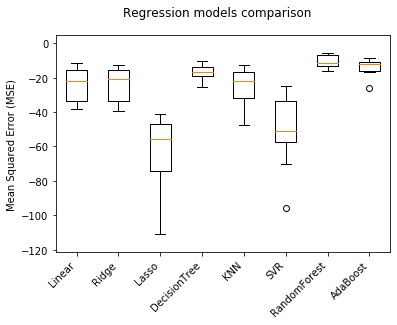

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

# user variables to tune
folds   = 10

# hold different regression models in a single dictionary
models = {}
models["Linear"]        = LinearRegression()
models["Ridge"]         = Ridge()
models["Lasso"]         = Lasso()
models["DecisionTree"]  = DecisionTreeRegressor()
models["KNN"]           = KNeighborsRegressor()
models["SVR"]           = SVR()
models["RandomForest"]  = RandomForestRegressor()
models["AdaBoost"]      = AdaBoostRegressor()

# 10-fold cross validation for each model
model_results_MSE = []
model_results_R2 = []
model_names   = []

for model_name in models:
    model   = models[model_name]
    k_fold  = KFold(n_splits=folds, random_state=seed)
    resultsM = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring="neg_mean_squared_error")
    resultsR = cross_val_score(model, X_train, Y_train, cv=k_fold, scoring="r2")
    model_results_MSE.append(resultsM)
    model_results_R2.append(resultsR)
    model_names.append(model_name)
    
    print("{}: {},{}".format(model_name,round(resultsM.mean(), 3), round(resultsR.mean(), 3)))

# box-whisker plot to compare regression models
figure = plt.figure()
figure.suptitle('Regression models comparison')
axis = figure.add_subplot(111)
plt.boxplot(model_results_MSE)
axis.set_xticklabels(model_names, rotation = 45, ha="right")
axis.set_ylabel("Mean Squared Error (MSE)")
plt.margins(0.05, 0.1)
#plt.savefig("model_mse_scores.png")
#plt.clf()
#plt.close()


###### Based on the above comparison, we can see that RandomForest Regression model outperforms all the other regression models. So, we will choose it as the best regression model for this problem

In [30]:
#create and fit the best regression model
best_model = RandomForestRegressor(random_state=seed)
best_model.fit(X_train, Y_train)

# make predictions using the model
predictions = best_model.predict(X_test)
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(Y_test,predictions))
# Explained variance score: 1 is perfect prediction
print("R Square score: %.2f" % r2_score(Y_test,predictions))

Mean squared error: 9.32
R Square score: 0.91


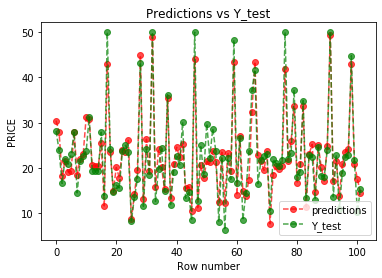

In [28]:
# plot between predictions and Y_test
x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, predictions, linestyle="--", marker="o", alpha=0.7, color='r', label="predictions")
plt.plot(x_axis, Y_test, linestyle="--", marker="o", alpha=0.7, color='g', label="Y_test")
plt.xlabel('Row number')
plt.ylabel('PRICE')
plt.title('Predictions vs Y_test')
plt.legend(loc='lower right')
#plt.savefig("predictions_vs_ytest.png")
#plt.clf()
#plt.close()